In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from pathlib import Path

In [2]:
candy_data_csv =Path("../Resources/Candy_Sales.csv")
candy_df= pd.read_csv(candy_data_csv)
candy_df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


In [5]:
# Clean Data
# Reduced matrix for Jose Moncada
candy_df_jose = candy_df.loc[:, ["Order Date", "Product Name", "Sales", "Units", "Gross Profit", "Cost"]]
candy_df_jose.head()

,Order Date,Product Name,Sales,Units,Gross Profit,Cost
0,2021-03-31,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,2021-03-31,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,2021-09-15,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,2021-09-15,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,2022-10-04,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


In [7]:
# Visualizations (2 per question = 12)

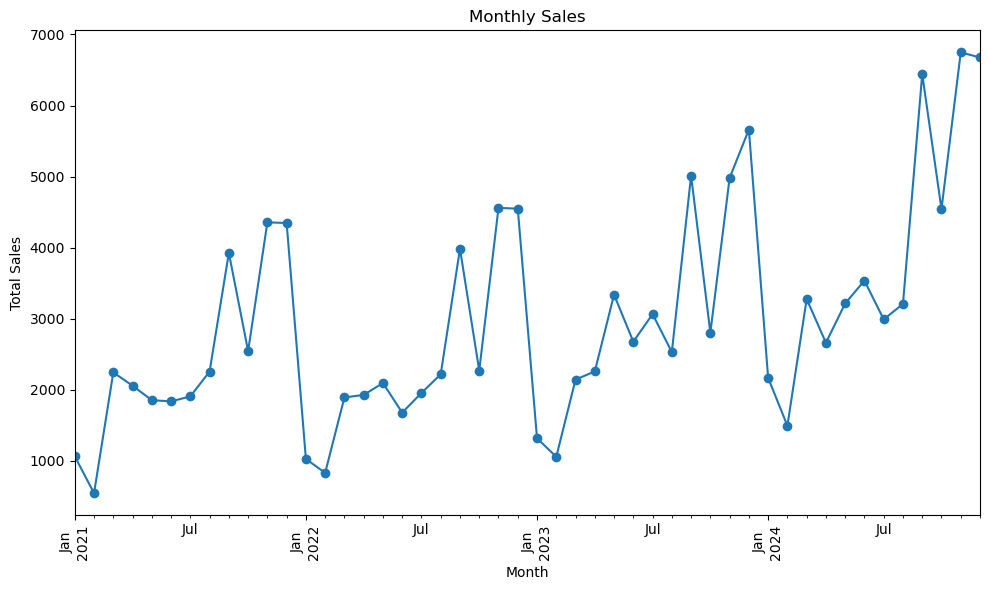

In [11]:
# Which Season Wins (Jose)
#Monthly Sales from 2021 to 2024

# Convert "Order Date" to datetime format
candy_df_jose["Order Date"] = pd.to_datetime(candy_df_jose["Order Date"])

# Extract year and month
candy_df_jose["Year-Month"] = candy_df_jose["Order Date"].dt.to_period("M")

# Group by "Year-Month" and sum the sales for each month
monthly_sales = candy_df_jose.groupby("Year-Month")["Sales"].sum()

# Plot the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


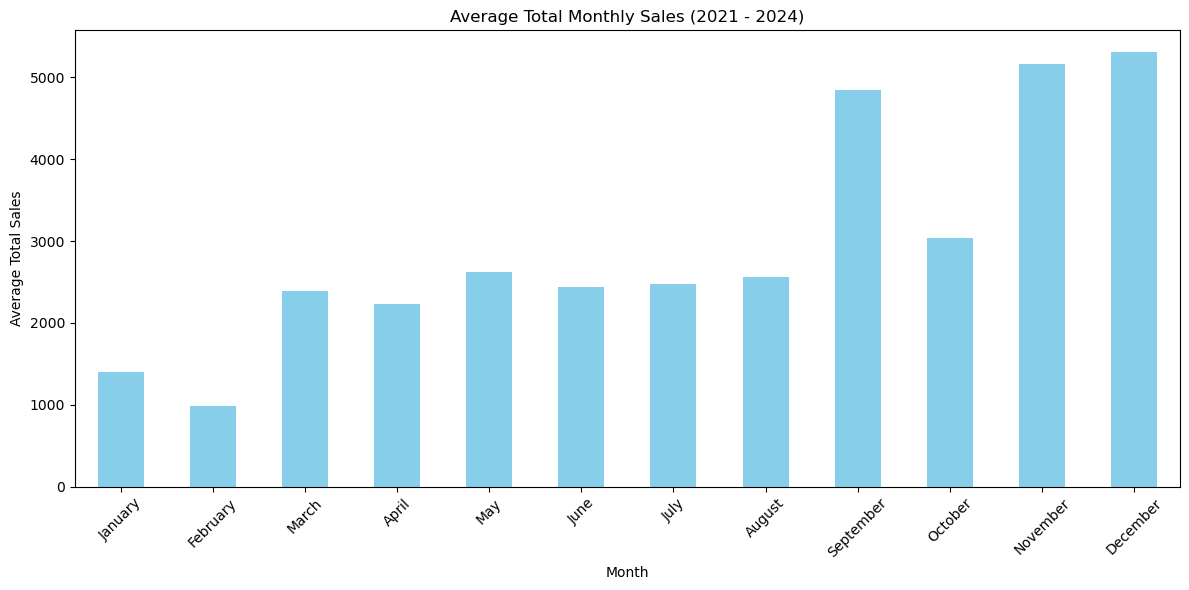

In [19]:
# Extract the month and year from the "Order Date"
candy_df_jose["Month"] = candy_df_jose["Order Date"].dt.month
candy_df_jose["Year"] = candy_df_jose["Order Date"].dt.year

# Group by year and month to calculate total sales
monthly_sales = candy_df_jose.groupby(["Year", "Month"])["Sales"].sum().reset_index()

# Group by month to calculate the average of total sales for each month across years
average_monthly_sales = monthly_sales.groupby("Month")["Sales"].mean()

# Create a list of month names for better labeling
month_names = [
    "January", "February", "March", "April", "May", 
    "June", "July", "August", "September", "October", 
    "November", "December"
]

# Reindex the average monthly sales to match the month names
average_monthly_sales.index = month_names

# Plot the average monthly sales
plt.figure(figsize=(12, 6))
average_monthly_sales.plot(kind="bar", color="skyblue")

# Set title and labels
plt.title("Average Total Monthly Sales (2021 - 2024)")
plt.xlabel("Month")
plt.ylabel("Average Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

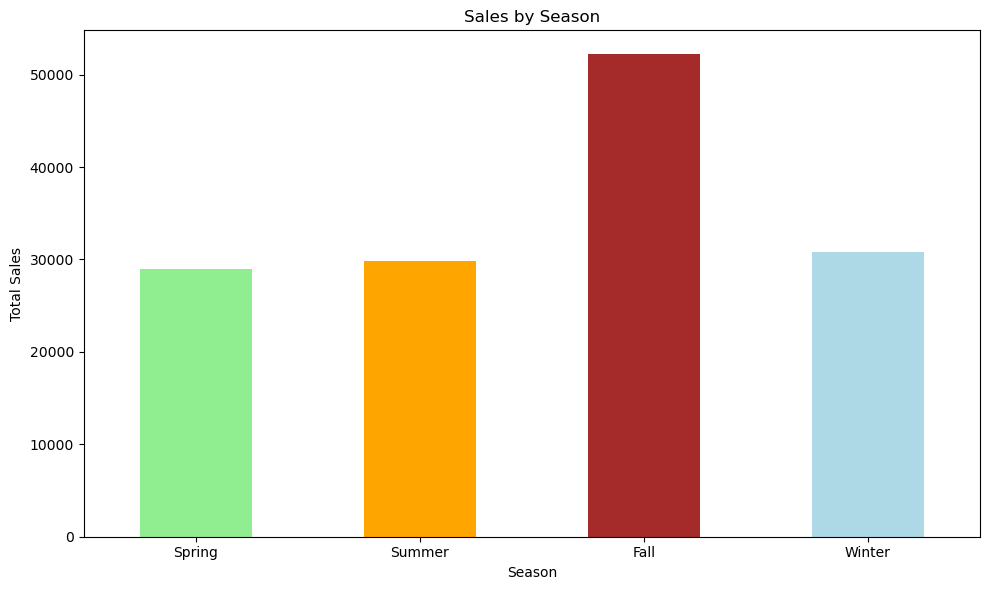

In [21]:

# Order Date Column used for Season Data
#Spring - March - April - May
#Summer - June - Juy - August
#Fall - September - October - November
#Winter - December - January - February

# Define the desired order of seasons
season_order = ["Spring", "Summer", "Fall", "Winter"]

# Reindex seasonal_sales to match the desired order
seasonal_sales = seasonal_sales.reindex(season_order)

# Plot the seasonal sales
plt.figure(figsize=(10, 6))
seasonal_sales.plot(kind="bar", color=["lightgreen", "orange", "brown", "lightblue"])

# Set title and labels
plt.title("Sales by Season")
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Trends over time (Nicholas)

In [ ]:
# Which type of candy dominates (Eric)

In [ ]:
# Regional Findings (Bianca)


In [ ]:
# Volume Vs. Cost (Aidan)

In [ ]:
# Which Company is most successful (Yvette)
